In [1]:
import pandas as pd
import numpy as np
import altair as alt
import vega

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OlexandrBratus/Introduction-to-Data-Visualization/master/Final_project/movie_metadata.csv')

In [3]:
df = df[['director_name', 'gross', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score']]

df = df[df.title_year >= 2000.0] # 21-st century

content = ['G', 'PG', 'PG-13', 'R']
countries = ['USA', 'UK', 'France', 'Canada', 'Germany', 'Australia', 'India', 'Spain', 'China'] # >25

df = df[df.content_rating.isin(content)]
df = df[df.country.isin(countries)]

df.rename(columns={"title_year": "year"}, inplace = True)
df['year'] = df['year'].astype(int)

df['budget'] = df['budget']/1000000
df['gross'] = df['gross']/1000000
df = df[df.budget < 280]
df['success'] = (df['gross'] - df['budget']) / df['budget']

df.head()

,director_name,gross,country,content_rating,budget,year,imdb_score,success
0,James Cameron,760.505847,USA,PG-13,237.0,2009,7.9,2.208885
2,Sam Mendes,200.074175,UK,PG-13,245.0,2015,6.8,-0.183371
3,Christopher Nolan,448.130642,USA,PG-13,250.0,2012,8.5,0.792523
5,Andrew Stanton,73.058679,USA,PG-13,263.7,2012,6.6,-0.722948
6,Sam Raimi,336.530303,USA,PG-13,258.0,2007,6.2,0.304381


# 1. Boxplot - distribution of budget by content_rating with tooltips(director_name, success)

In [4]:
bg_color = '#F3F7F7'
titlecolor = '#3A3F4A'
titlesize = 36
textcolor = '#5D646F'
textsize = 14
domain = (int(np.floor(df.imdb_score.min())), 0, int(np.ceil(df.imdb_score.max())))
color_scale = ('#67001f', '#f7f7f7', '#053061')
font = 'Ubuntu Mono'
figsize = (440, 775)
opacity = .7

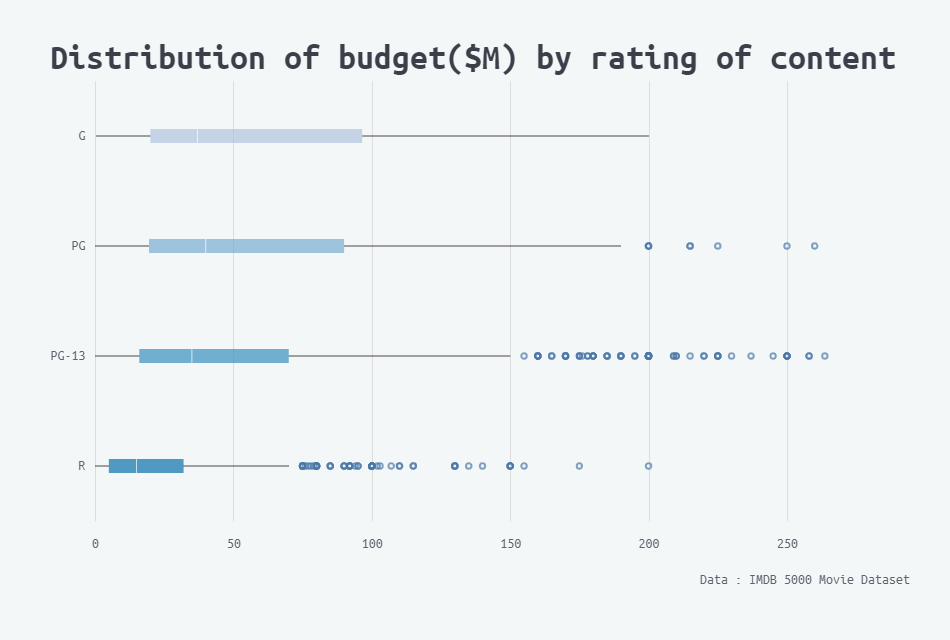

In [5]:
xaxis = alt.Axis(values = tuple(range(0, 300, 50)),
                 title=None,
                 #titleColor = textcolor,
                 #titleFontSize = textsize,
                 #titlePadding = 25,
                 #grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelPadding = 15,
                 labelAlign = 'center'
                 )
yaxis = alt.Axis(
                 title=None,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelPadding = 10,
                 labelAlign = 'right'
                 )
chart1 = alt.Chart(df)
chart1 = chart1.mark_boxplot(opacity=opacity)
chart1 = chart1.encode(
    x = alt.X('budget:Q', axis=xaxis),
    y = alt.Y('content_rating', axis=yaxis, sort = alt.Sort(field = 'budget', op = 'mean', order = 'descending')),
    color = alt.Color('content_rating', scale=alt.Scale(scheme='purpleblue'), legend=None),
    tooltip = alt.Tooltip(['director_name', 'success'])
).properties(
    height=figsize[0], width=figsize[1]
)
chart1_ = chart1.configure_title(
    color=titlecolor,
    font=font,
    fontSize=titlesize,
    anchor='start'
)
chart1_.title = 'Distribution of budget($M) by rating of content'
#chart1_

legend = pd.DataFrame({'success':range(-2, 3, 1)})
xaxis = alt.Axis(values = [-2, -1, 0, 1, 2, 3],
                 title='Success of movie',
                 titleFontSize = textsize,
                 titleFontWeight='lighter',
                 titleFont=font,
                 titleAnchor='start',
                 titleY=-25,
                 titleColor=textcolor,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelAlign='center'
                 )
chart2 = alt.Chart(legend)
chart2 = chart2.mark_rect(opacity=opacity)
chart2 = chart2.encode(
    x = alt.X('success:N', axis=xaxis),
    color = alt.Color('success:Q', legend=None,
        scale=alt.Scale(scheme="purpleblue")
    )
).properties(
    height=8, width=figsize[1]-figsize[1] // (29*2), title=''
)
#chart2

annotation = alt.Chart(
    dict(values= dict(text=" "*80+"Data : IMDB 5000 Movie Dataset"))
)
annotation = annotation.mark_text(size=textsize, 
            color=textcolor, 
            font=font,
            align='left',
            )
annotation = annotation.encode(
    text="text:N"
)
annotation.configure_view(
    stroke=None
)

chart = alt.vconcat(chart1, annotation).configure_title(
    color=titlecolor,
    font=font,
    fontSize=titlesize,
    anchor='start'
).properties(
    padding={'left': 50, 'top': 40, 'right': 40, 'bottom': 50},
    title=alt.TitleParams('',dx=90),
    background=bg_color
).configure_view(
    stroke=None
)
chart.title = 'Distribution of budget($M) by rating of content'
chart

# 2. Heatmap - IMDB score by year, country

In [6]:
bg_color = '#F3F7F7'
titlecolor = '#3A3F4A'
titlesize = 36
textcolor = '#5D646F'
textsize = 12
domain = (int(np.floor(df.imdb_score.min())), 0, int(np.ceil(df.imdb_score.max())))
color_scale = ('#67001f', '#f7f7f7', '#053061')
font = 'Ubuntu Mono'
figsize = (440, 775)
opacity = .7

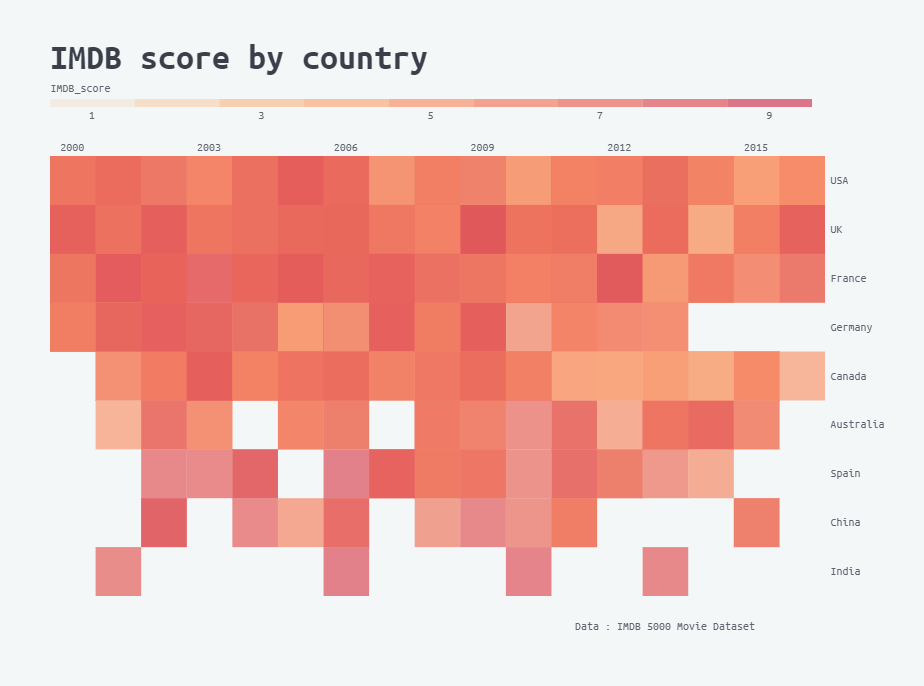

In [7]:
xaxis = alt.Axis(values = tuple(range(2000,2016,3)),
                 title=None,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelPadding= -figsize[0]-15,
                 labelAlign='center'
                 )
yaxis = alt.Axis(
                 title=None,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelPadding = -1*figsize[1]-5,
                 labelAlign = 'left'
                 )
chart1 = alt.Chart(df)
chart1 = chart1.mark_rect(opacity=opacity)
chart1 = chart1.encode(
    x = alt.X('year:O', axis=xaxis),
    y = alt.Y('country:O', axis=yaxis, sort=alt.Sort(field='imdb_score', op='count', order='descending')),
    color = alt.Color('imdb_score',
        scale=alt.Scale(scheme='lightorange'),
        legend=None
    )
).properties(
    height=figsize[0], width=figsize[1]
)
chart1_ = chart1.configure_title(
    color=titlecolor,
    font=font,
    fontSize=titlesize,
    anchor='start'
)
chart1_.title = 'IMDB_score by country'
#chart1_

legend = pd.DataFrame({'imdb_score':range(1, 10)})
xaxis = alt.Axis(values = [1, 3, 5, 7, 9],
                 title='IMDB_score',
                 titleFontSize = textsize,
                 titleFontWeight='lighter',
                 titleFont=font,
                 titleAnchor='start',
                 titleY=-25,
                 titleColor=textcolor,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelAlign='center'
                 )
chart2 = alt.Chart(legend)
chart2 = chart2.mark_rect(opacity=opacity)
chart2 = chart2.encode(
    x = alt.X('imdb_score:N', axis=xaxis),
    color = alt.Color('imdb_score:Q', legend=None,
        scale=alt.Scale(scheme="lightorange")
    )
).properties(
    height=8, width=figsize[1]-figsize[1] // (29*2), title=''
)
#chart2

annotation = alt.Chart(
    dict(values= dict(text=" "*80+"Data : IMDB 5000 Movie Dataset"))
)
annotation = annotation.mark_text(size=textsize, 
            color=textcolor, 
            font=font,
            align='left',
            )
annotation = annotation.encode(
    text="text:N"
)
annotation.configure_view(
    stroke=None
)

chart = alt.vconcat(chart2, chart1, annotation).configure_title(
    color=titlecolor,
    font=font,
    fontSize=titlesize,
    anchor='start'
).properties(
    padding={'left': 50, 'top': 40, 'right': 40, 'bottom': 50},
    title=alt.TitleParams('',dx=90),
    background=bg_color
).configure_view(
    stroke=None
)
chart.title = 'IMDB score by country'
chart

# 3. Barchart - top10 directors by total gross

In [8]:
titlecolor = '#3A3F4A'
titlesize = 36
textcolor = '#5D646F'
textsize = 14
subtitlesize = 18
color_scale = ('#67001f', '#f7f7f7', '#053061')
font = 'Ubuntu Mono'

In [9]:
counts = pd.DataFrame(df.director_name.value_counts())
counts['count'] = counts['director_name']
counts = counts[['count']]

dff = df.groupby(by = ['director_name']).sum().sort_values(by='gross', ascending=False)[:10]
dff = dff[['gross']]
dff = dff.merge(counts, how='left', left_on=dff.index, right_on=counts.index)
dff = dff.rename(columns = {"key_0":"director_name"})
dff.set_index("director_name")

,gross,count
director_name,,
Sam Raimi,1962.008366,7
Michael Bay,1829.855401,10
Christopher Nolan,1813.227576,8
Joss Whedon,1730.886628,4
Jon Favreau,1562.381547,7
Steven Spielberg,1515.515769,12
Tim Burton,1483.924175,10
Peter Jackson,1366.820417,6
Francis Lawrence,1358.501971,5


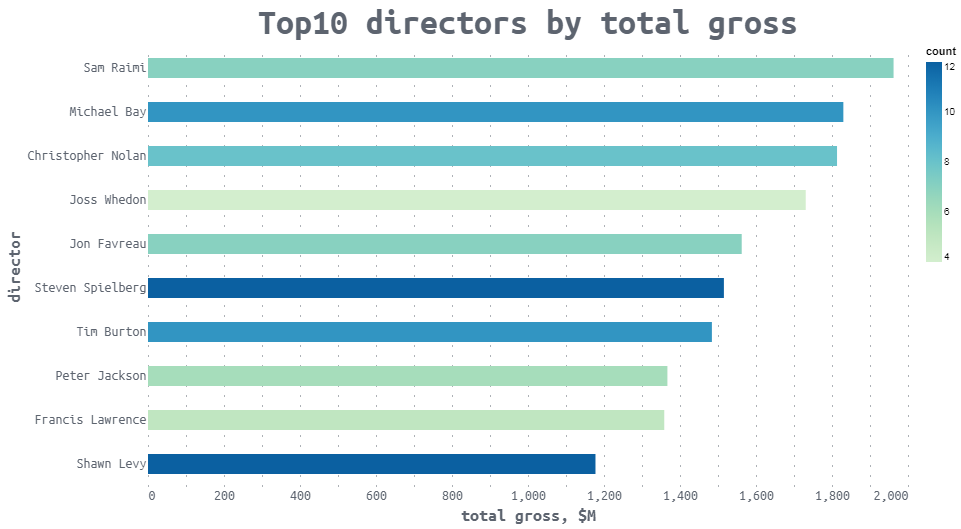

In [10]:
chart = alt.Chart(dff.reset_index()).mark_bar(height=20).encode(
    x=alt.X('gross:Q',
            scale=alt.Scale(domain=[0, 2000])
    ),
    y=alt.Y('director_name:N',
            sort=alt.Sort(field='gross',order='descending'),
    ),
    color = alt.Color('count:Q',
                      scale=alt.Scale(scheme="greenblue"),
    )
).properties(
    height=440,
    width=760
).configure_axis(
    grid=False,
    ticks=False,
    domain=False,
    labelColor=textcolor,
    titleColor=textcolor,
    titleFont=font,
    labelFont=font,
    labelFontSize=textsize,
    titleFontSize=subtitlesize
).configure_view(
    stroke=None
).configure_axisX(
    grid=True,
    gridColor=textcolor,
    gridDash=(1,9),    
).configure_axisY(
    labelFontSize=textsize,
    labelLimit=400
).configure_title(
    color = textcolor,
    fontSize=titlesize,
    font = font
)

chart.title = 'Top10 directors by total gross'
chart.encoding.x.title = 'total gross, $M'
chart.encoding.y.title = 'director'

chart